# Random Forest Classifier - Label 2

Classification on Label 2 (copepod vs noncopepod, no detritus).

In [ ]:
# delete variables in memory
%reset

In [1]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

Load the data which have been processed in R

In [2]:
train = pd.read_csv("../../../data/processed/labelled-features/labelled-features-train.csv")
train = train.set_index('index')
train
test = pd.read_csv("../../../data/processed/labelled-features/labelled-features-test.csv")
test = test.set_index('index')

In [3]:
print(train["label2"].unique())

['noncopepod' 'copepod' 'detritus']


In [4]:
print(train.shape)
print(test.shape)

(51309, 39)
(5682, 39)


Remove the rows which correspond to detritus

In [5]:
print( np.sum( train.label2.str.contains("detritus") ) )
print( np.sum( test.label2.str.contains("detritus") ) )

36000
4000


In [6]:
train = train[~train.label2.str.contains("detritus")]
test = test[~test.label2.str.contains("detritus")]

In [7]:
print(train.shape)
print(test.shape)

(15309, 39)
(1682, 39)


Remove unwanted columns

In [8]:
for col in train.columns:
    print(col)

filename
label1
label2
label3
object_label
object_width
object_height
object_bx
object_by
object_circ.
object_area_exc
object_area
object_%area
object_major
object_minor
object_y
object_x
object_convex_area
object_min
object_max
object_mean
object_intden
object_perim.
object_elongation
object_range
object_perimareaexc
object_perimmajor
object_circex
object_angle
object_bounding_box_area
object_eccentricity
object_equivalent_diameter
object_euler_number
object_extent
object_local_centroid_col
object_local_centroid_row
object_solidity
img_file_name
img_rank


These are the columns we are retaining in the features matrix (X)

In [9]:
cols_retain = [ col for col in train.columns if col not in ['filename', 'label1', 'label2', 'label3',
                                                           'img_file_name', 'img_rank'] ]

In [10]:
for col in cols_retain:
    print(col)

object_label
object_width
object_height
object_bx
object_by
object_circ.
object_area_exc
object_area
object_%area
object_major
object_minor
object_y
object_x
object_convex_area
object_min
object_max
object_mean
object_intden
object_perim.
object_elongation
object_range
object_perimareaexc
object_perimmajor
object_circex
object_angle
object_bounding_box_area
object_eccentricity
object_equivalent_diameter
object_euler_number
object_extent
object_local_centroid_col
object_local_centroid_row
object_solidity


Define train and test matrices. First encode labels

In [11]:
# Encode taget labels with value between 0 and n_classes-1
LE = LabelEncoder()
LE.fit( train['label2'] ) # fit label encoder
y_train = LE.transform( train['label2'] ) # transform labels to normalized encoding
y_test = LE.transform( test['label2'] ) # transform labels to normalized encoding

Just making sure that the above has worked

In [12]:
( np.sum(y_train == 1) ) == ( np.sum(train['label2'] == 'noncopepod') )

True

In [13]:
( np.sum(y_test == 1) ) == ( np.sum(test['label2'] == 'noncopepod') )

True

In [14]:
X_train = train[cols_retain]  # Features
X_test = test[cols_retain]  # Features

In [15]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100) # this is the default number of trees in the forest

In [16]:
import time

tic = time.perf_counter()
clf.fit(X_train,y_train) # Train the model using the training sets
toc = time.perf_counter()

print("Time to train model: %.4f seconds" % (toc-tic))

Time to train model: 3.9057 seconds


In [17]:
#Make prediction using features in test set
y_pred=clf.predict(X_test)
y_pred

array([0, 0, 1, ..., 0, 0, 0])

In [18]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Mean Absolute Error: 0.25743162901307964
Mean Squared Error: 0.25743162901307964
Root Mean Squared Error: 0.5073772058469711
Accuracy: 0.7425683709869203


In [19]:
print(metrics.classification_report(y_test,y_pred, target_names=LE.classes_))

              precision    recall  f1-score   support

     copepod       0.76      0.84      0.80      1022
  noncopepod       0.71      0.59      0.64       660

    accuracy                           0.74      1682
   macro avg       0.73      0.72      0.72      1682
weighted avg       0.74      0.74      0.74      1682



In [29]:
precision, recall, f1_score, _ = metrics.precision_recall_fscore_support(
    y_test, y_pred,beta=1.0, average='macro')

print(precision)
print(recall)
print(f1_score)

0.7330472164872497
0.7157089485856609
0.7208660401822347


In [21]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100

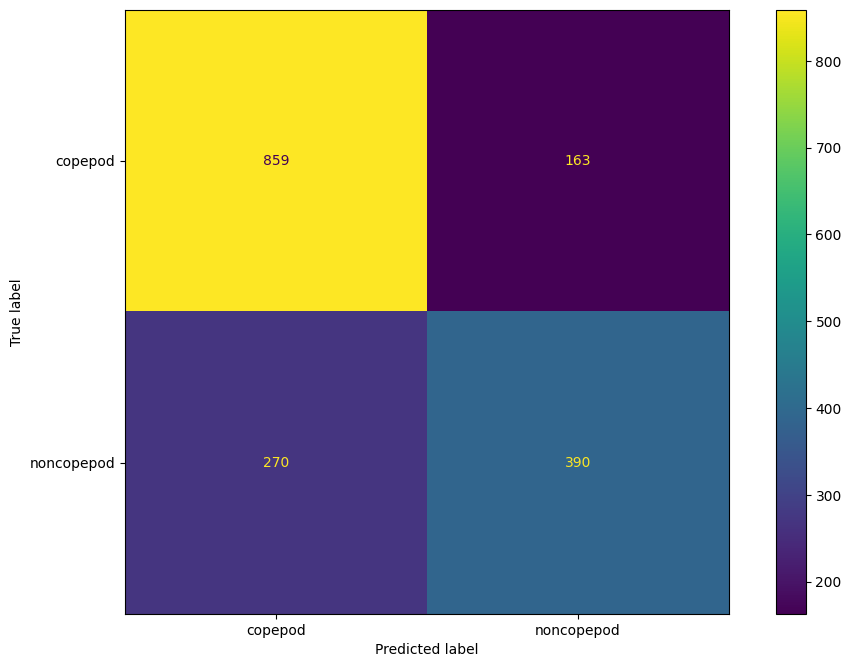

In [22]:
metrics.plot_confusion_matrix(clf, X_test, y_test, display_labels = LE.classes_) 
plt.show()

Find important features for classification

In [23]:
feature_names = X_train.columns
feature_imp = pd.Series(clf.feature_importances_,index=feature_names).sort_values(ascending=False)
print(feature_imp)

object_mean                   0.144112
object_range                  0.132546
object_max                    0.113246
object_min                    0.111840
object_intden                 0.095976
object_area                   0.030306
object_circ.                  0.030250
object_circex                 0.028775
object_area_exc               0.026737
object_equivalent_diameter    0.025045
object_convex_area            0.023773
object_bounding_box_area      0.023144
object_eccentricity           0.021755
object_major                  0.021474
object_elongation             0.021315
object_perimareaexc           0.021151
object_perimmajor             0.020024
object_perim.                 0.017945
object_y                      0.016043
object_local_centroid_row     0.016023
object_height                 0.015211
object_width                  0.011140
object_minor                  0.010025
object_x                      0.009855
object_local_centroid_col     0.009245
object_angle             

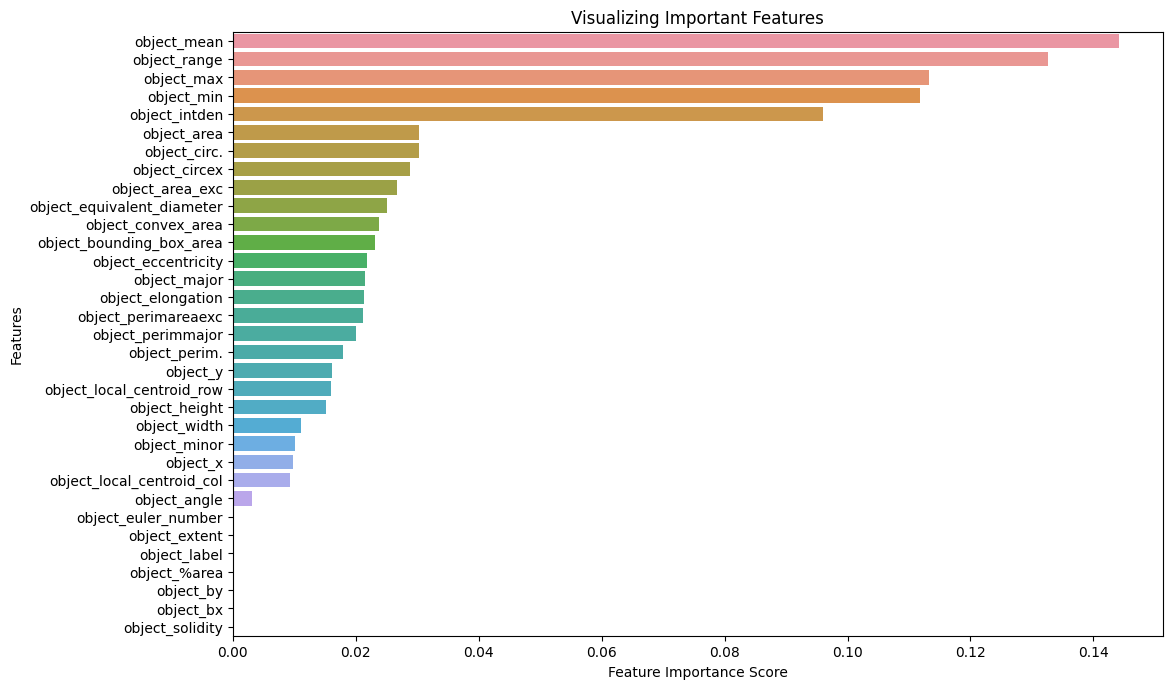

In [24]:
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

Note that evaluate_model.py must be in the working directory

Plot ROC curve - 
reference: https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/

ROC AUC=0.792


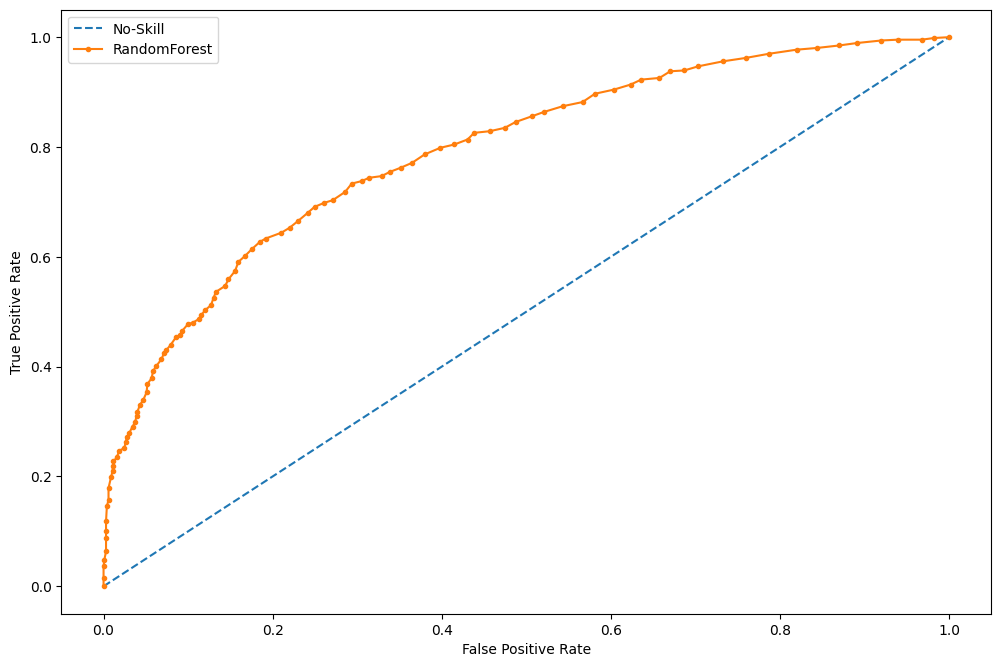

In [25]:
from evaluate_model import plot_roc
fig = plot_roc(clf, X_test, y_test)

Plot Precision-Recall Curve - reference: https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/

RndomForest: f1=0.643 AUC=0.737


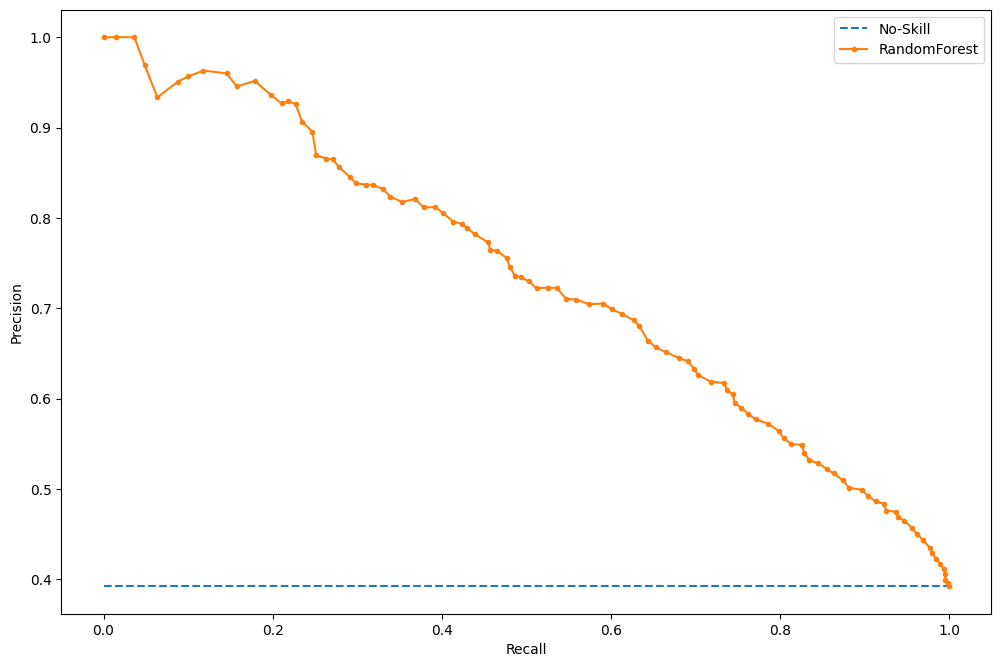

In [26]:
from evaluate_model import plot_precision_recall
fig = plot_precision_recall(clf, X_test, y_test, y_pred)

The following calculates precision, recall, accuracy and f1 using the pre-computed confusion matrix

In [27]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

In [30]:
from evaluate_model import model_metrics
accuracy, precision, recall, f1 = model_metrics(confusion_matrix)
print("precision = %.3f" % precision)
print("recall = %.3f" % recall)
print("accuracy = %.3f" % accuracy)
print("f1 = %.3f" % f1)

precision = 0.733
recall = 0.716
accuracy = 0.743
f1 = 0.721


Export pre-trained model as pkl file so that it can later be used in scivision

In [ ]:
with open('/output/models/randomforest/rf-label2.pkl','wb') as f:
    pickle.dump(clf,f)